In [1]:
import numpy as np
import re
import json
import gzip
from collections import defaultdict


In [2]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2021-09-18 13:21:03--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  4.72MB/s    in 47s     

2021-09-18 13:21:50 (10.1 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# ntlk.download('stopwords')
# stop_words=set(stopwords.words('english'))
file = 'reviews_Electronics_5.json.gz' 
content = []
duplicate = []
with gzip.open(file,'rb') as input:
  for line in input:
    line =line.rstrip()
    if line:
      instance=json.loads(line)
      content.append(instance['reviewText'])
      
      if len(content)==100000:
        break
from nltk.tokenize import sent_tokenize        
data = [re.sub(r'[,!?;-]', '.', review) for review in content]      
for i in data:
  for j in i.split("."):
    # token=sent_tokenize(i)
    # for j in token:
        if j.strip():
            duplicate.append(j.strip())
data=duplicate 
print(len(data))
count=0  
for i in data:
  count+=1
  if count <5:
    #  for j in i:  
    print(i)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
1310851
We got this GPS for my husband who is an (OTR) over the road trucker
Very Impressed with the shipping time
it arrived a few days earlier than expected
within a week of use however it started freezing up


In [5]:


from nltk.tokenize import RegexpTokenizer
# toktok = ToktokTokenizer()
tokenizer = RegexpTokenizer(r'\w+')
# data = [re.sub(r'[,!?;-]', '.', sent) for sent in data]
data = [tokenizer.tokenize(sent) for sent in data]
print(data)
tokenizing=[] # converting to lower case
for sent in data:
  inst=[]
  for word in sent:
    inst.append(word.lower())
  tokenizing.append(inst)

# print(data)




# check = [[ch.lower() for ch in sent if ch.isalpha() or ch == '.'] for sent in data]
# print(len(check))
data = tokenizing  
# print(len(data))

Frequency = defaultdict(int)


# in store=0 



def Remove_Frequency(data):
  Retu=[]
  for i in data:
    current=[token for token in i if Frequency[token]>5]

    if len(current)>0:
      Retu.append(current)
  return Retu
def Frequencies(data):
  for i in data:
    for token in i:
      Frequency[token]+=1
Frequencies(data)
data = Remove_Frequency(data)

# print(Index['we']) 





IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
Index=defaultdict(list)
Word=defaultdict(list)
count=0
import pickle
assign=0    
for i in Frequency:
   if Frequency[i]>5:
     Index[i]=assign
     Word[assign]=i
     assign+=1

print(len(data))
for sent in data:
  count+=1
  if(count<7):
    print(sent)
    for j in sent:
      print(Index[j])
  # for j in sent  :
  # number+=len(sent)
# np.savetxt(fname="svdmap.csv", delimiter=",", X=Index)
print(len(Frequency),len(Word))
embedding = {i:Index[i] for i in Index}
file = open("svdword2index.pkl","wb")
pickle.dump(embedding,file)
file.close()
embedding = {i:Word[i] for i in Word}
file = open("svdindex2word.pkl","wb")
pickle.dump(embedding,file)
file.close()


1303039
['we', 'got', 'this', 'gps', 'for', 'my', 'husband', 'who', 'is', 'an', 'otr', 'over', 'the', 'road', 'trucker']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
['very', 'impressed', 'with', 'the', 'shipping', 'time']
15
16
17
12
18
19
['it', 'arrived', 'a', 'few', 'days', 'earlier', 'than', 'expected']
20
21
22
23
24
25
26
27
['within', 'a', 'week', 'of', 'use', 'however', 'it', 'started', 'freezing', 'up']
28
22
29
30
31
32
20
33
34
35
['could', 'of', 'just', 'been', 'a', 'glitch', 'in', 'that', 'unit']
36
30
37
38
22
39
40
41
42
['worked', 'great', 'when', 'it', 'worked']
43
44
45
20
43
86910 21330


In [7]:
window=3
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix

Mat= sparse.lil_matrix((len(Word),len(Word)))

for sent in data:
  for j in range(1,len(sent)):
    for k in range(max(0,j-window+1),min(j-1,len(sent))):
      Mat[Index[sent[j]],Index[sent[k]]]+=1


In [10]:
Final_Mat=Mat+Mat.transpose()

In [11]:
from scipy.sparse.linalg import svds
# print(Final_Mat[0])
# from numpy import array
# final_mat=array(Final_Mat)
U,S,Vt=svds(Final_Mat,k=100)

In [12]:
# keys=list(Index.keys())
# vals=list(Index.values())
# print
# import gensim
# from gensim.models import KeyedVectors
# model=KeyedVectors.load_word2vec_format(U,binary=False)

print(len(U),len(Frequency))
print(U)


21330 86910
[[-6.99118366e-03  2.09954310e-02 -1.04119408e-03 ... -6.37983092e-03
   6.96618399e-03 -8.08677294e-03]
 [-2.93581076e-02 -3.31507741e-02  9.89088783e-02 ... -1.30037632e-02
  -9.53387862e-03 -1.18762840e-02]
 [ 2.33067133e-03  1.03577541e-02  3.24285739e-03 ... -1.28181563e-01
  -8.24096480e-02 -1.65296098e-01]
 ...
 [ 1.23853550e-04  4.53597468e-05  1.39945682e-04 ... -1.28116060e-05
  -4.13571645e-06 -2.47529398e-06]
 [ 1.04973650e-04  7.84045687e-05 -1.38032462e-04 ...  8.06461166e-06
  -2.97974987e-07 -4.09303115e-06]
 [-9.91073096e-05 -6.20302495e-05 -1.39212607e-04 ... -1.13420989e-05
  -4.28550069e-06 -2.52842170e-06]]


In [13]:
# U=U[:,:2]

# print(U.shape)
import os
model = (U)
# np.savetxt(fname="svd.csv", delimiter=",", X=model)


# model.save('svd_model')
# print(Final_Mat.shape)
# c=0
# for i in  U:
#   if c<21:
#     print(c)
#     print(i)
#   c+=1  
# print(Index['camera'])  
output=[]
# print(Index18957[])
# print(Word[18957])
# count=0
# for i in range(0, len(Word)):
#   if i>=18950 and i <=18960:
#     print(Word[i])
#     # output.append(Word[i])
#     count+=1
# print(count)  
 
c=0 
from sklearn.metrics.pairwise import cosine_similarity
import math

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
# model.similarity('camera')
def cosine_similarity_calc(vec_1,vec_2):
	
	sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))
	
	return sim
from scipy import spatial
vector1=U[Index['camera']]
for i in range(0,len(U)):
  # check=i/np.linalg.norm(U[i])
  # angle=np.arccos(np.dot(vector1,check))
  Angle=cosine_similarity_calc(U[Index['camera']],U[i])
  # print(Index[i])
  # print(Angle)
  output.append([Angle,(Word[i])])
  c+=1
output.sort(reverse=True)  

# output.sort(key=lambda y: y[0])
# for i in output:
  # print(i[1])
print(output[:15])  



[[1.0000000000000002, 'camera'], [0.5987487309583829, 'lens'], [0.5851050452569901, 'eyes'], [0.5399083961951315, 'k20d'], [0.5364609233945745, 'dslr'], [0.5090216058757003, 'subjects'], [0.5046595217076206, 'filter'], [0.49812043023803276, 'tripod'], [0.496260826699671, 'pda'], [0.4957497354707151, 'gps'], [0.4943763142726188, 'handheld'], [0.4891751107539814, 'laptop'], [0.4683691251828655, 'sub'], [0.4627542299450834, 'd7100'], [0.46266978598876196, 'scope']]


In [34]:
print(Final_Mat[Index['camera'],Index['dolby']])
embedding = [i for i in U]
file = open("svd.pkl","wb")
pickle.dump(embedding,file)
file.close()

0.0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


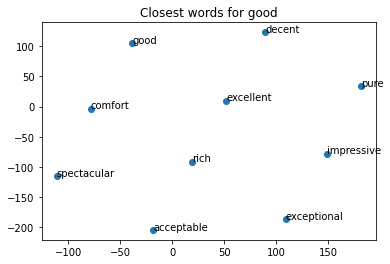

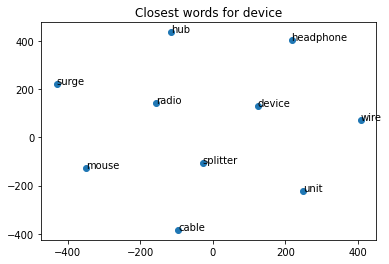

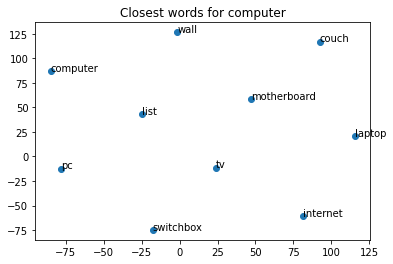

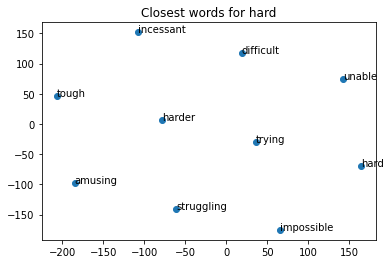

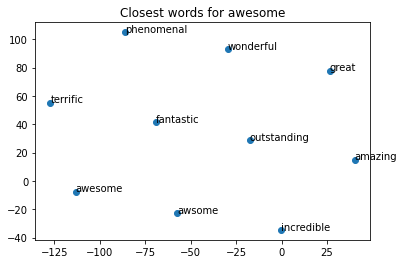

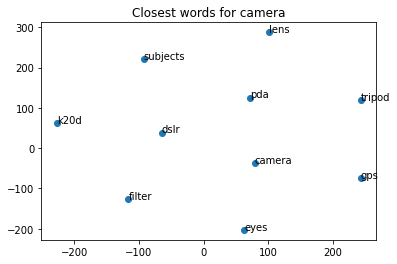

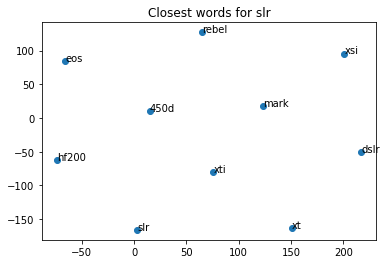

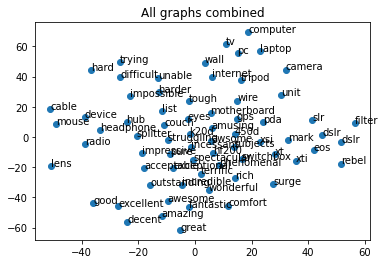